In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rma1 = pd.read_csv("2023-07-06_weaver_cpybench_rma_np1.csv")
umg1l = pd.read_csv("2023-07-06_weaver_cpybench_umgl_np1.csv")
umg1r = pd.read_csv("2023-07-06_weaver_cpybench_umgr_np1.csv")

In [3]:
def calculate_new_attrs(df):
    df["size"] = df["n"]*df["n"]*df["n"]
    df["UPs-mean"] = df["size"]*df["N"]/df["time_TplusdT-mean"]
    df["GUPs-mean"] = 1e-9*df["UPs-mean"]

In [4]:
calculate_new_attrs(rma1)
calculate_new_attrs(umg1l)
calculate_new_attrs(umg1r)

In [5]:
dfs = [rma1, umg1l, umg1r]
labels = ["rma", "unmanaged LOCAL", "unmanaged REMOTE"]

In [6]:
def figure_for_attribute(dfs, labels, attribute, ylabel = None):
    if ylabel is None:
        ylabel = attribute
    
    if len(dfs) == 0:
        print("required to have at least one line to plot")
    
    maxy = 0
    for df in dfs:
        cur_max = max(df[f"{attribute}-mean"])
        if cur_max > maxy:
            maxy = cur_max
    
    if labels is None:
        print("required to label each line")
        
    plt.figure(figsize=[10,6])
    for df, dflabel in zip(dfs,labels):
        plt.plot(df["n"], df[f"{attribute}-mean"], "*-", label=dflabel)
    plt.title(f"update benchmark ({attribute.replace('_',' ')})")
    plt.legend()
    plt.xlabel("problem size (cubic array of size n)")
    plt.ylabel(ylabel)
    plt.ylim(0,int(maxy+1))
    plt.show()

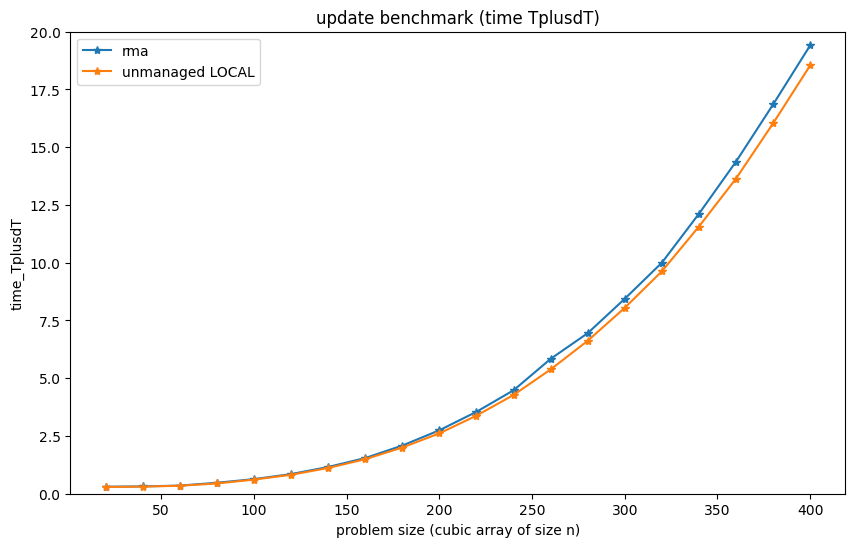

In [7]:
figure_for_attribute(dfs, labels, "time_TplusdT")

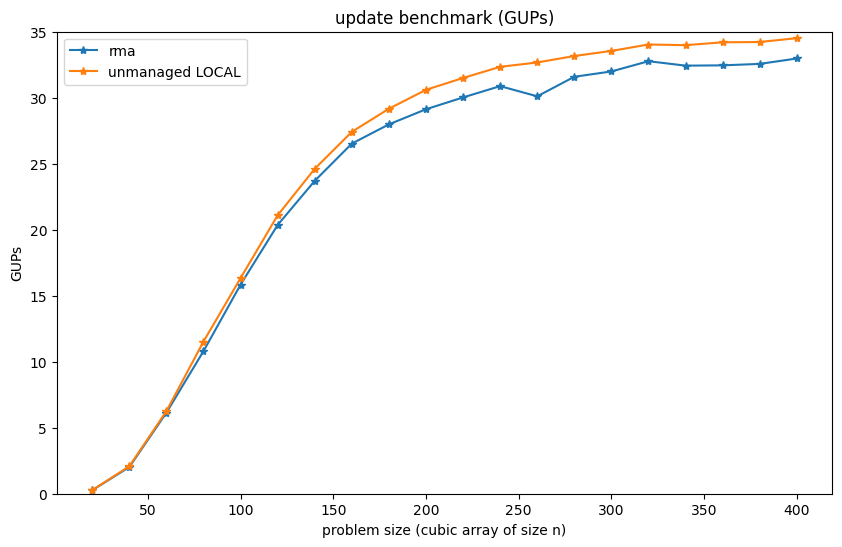

In [8]:
figure_for_attribute(dfs, labels, "GUPs")